In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/Snail_No_Bact/"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/Snail_No_Bact/snail2_no_bact.mm', '/media/cjw/Data/cyto/Snail_No_Bact/snail3_no_bact.mm', '/media/cjw/Data/cyto/Snail_No_Bact/snail5_no_bact.mm', '/media/cjw/Data/cyto/Snail_No_Bact/snail4_no_bact.mm', '/media/cjw/Data/cyto/Snail_No_Bact/snail1_no_bact.mm']
(4,) [9621   64   64    5]
(4,) [8929   64   64    5]
(4,) [9962   64   64    5]
(4,) [9786   64   64    5]
(4,) [9852   64   64    5]
48150


dict_keys(['snail2_no_bact.mm', 'snail3_no_bact.mm', 'snail5_no_bact.mm', 'snail4_no_bact.mm', 'snail1_no_bact.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

9621
8929
9962
9786
9852


Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32) (?, 32, 32, 3)
Tensor("latent_space/BiasAdd:0", shape=(?, 256), dtype=float32)
isize:  4 32
Tensor("Sigmoid:0", shape=(?, 32, 32, 3), dtype=float32)
48150 376 128
47638 512
Epoch:  0 Iteration:  0 Loss:  410.87207 409.24945 1.6226102


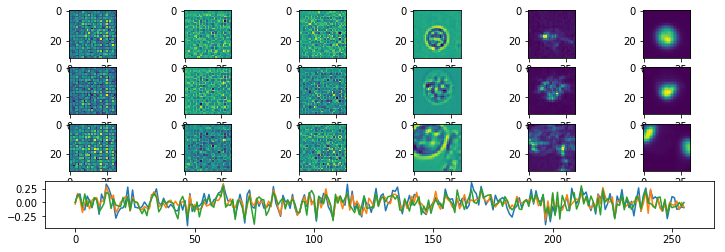

Epoch:  1 Iteration:  0 Loss:  27.879583 25.2028 2.6767824


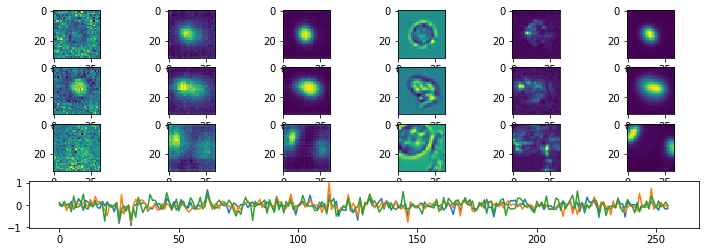

Epoch:  2 Iteration:  0 Loss:  21.065382 19.38709 1.6782913


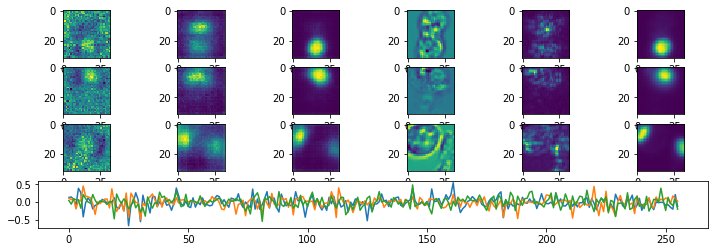

Epoch:  3 Iteration:  0 Loss:  18.748934 17.418396 1.3305385


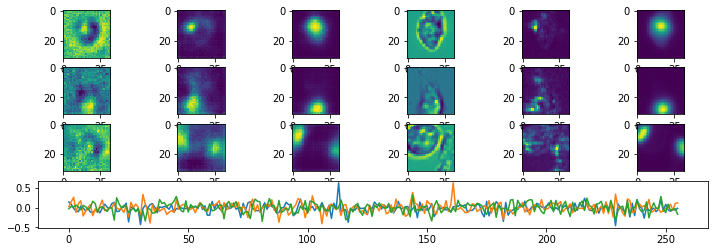

Epoch:  4 Iteration:  0 Loss:  15.7645645 14.635456 1.1291084


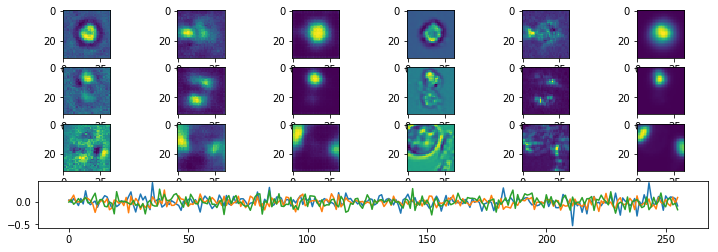

Epoch:  5 Iteration:  0 Loss:  13.355948 12.322188 1.0337603


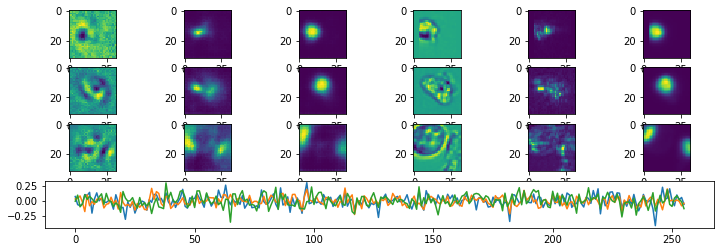

Epoch:  6 Iteration:  0 Loss:  12.809325 11.883759 0.9255663


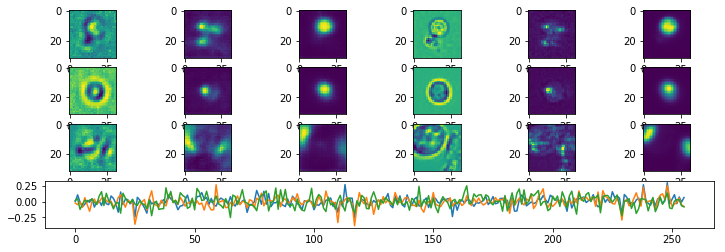

Epoch:  7 Iteration:  0 Loss:  11.103151 10.2625065 0.8406445


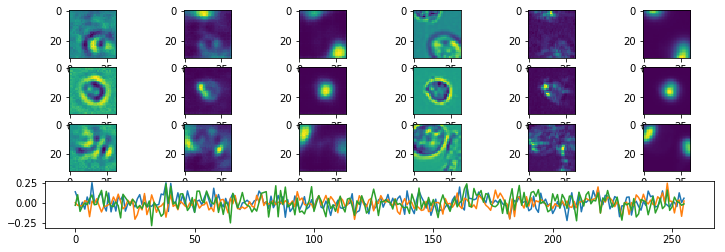

Epoch:  8 Iteration:  0 Loss:  10.834779 10.05271 0.7820689


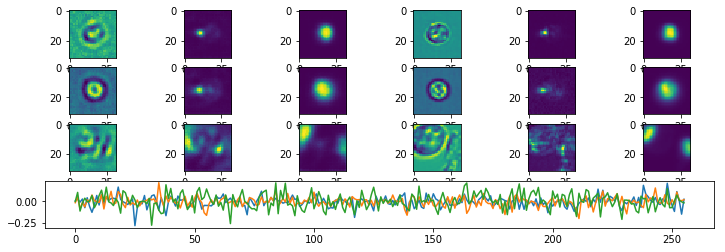

Epoch:  9 Iteration:  0 Loss:  9.193566 8.476902 0.71666455


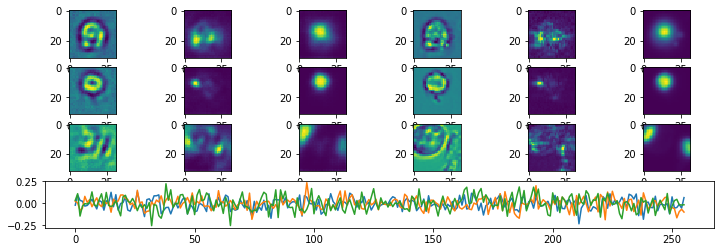

Epoch:  10 Iteration:  0 Loss:  8.869629 8.162107 0.70752186


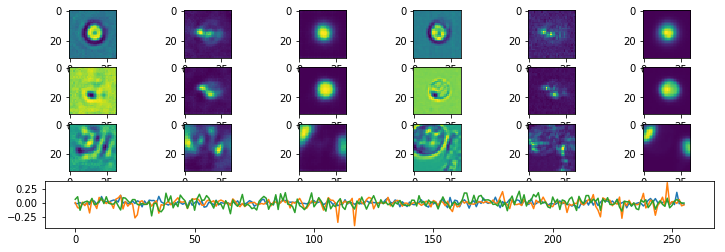

Epoch:  11 Iteration:  0 Loss:  9.153161 8.479303 0.6738577


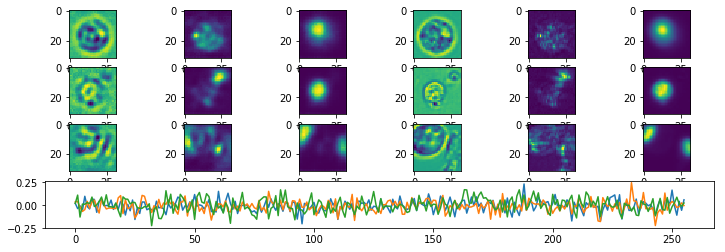

Epoch:  12 Iteration:  0 Loss:  8.572459 7.9498806 0.62257886


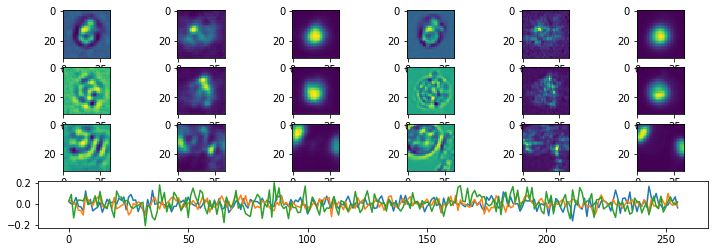

Epoch:  13 Iteration:  0 Loss:  7.763631 7.163988 0.599643


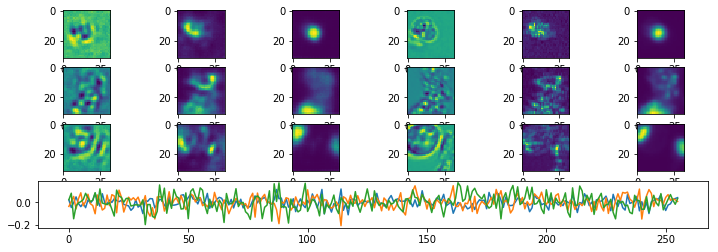

Epoch:  14 Iteration:  0 Loss:  8.639289 8.059454 0.57983476


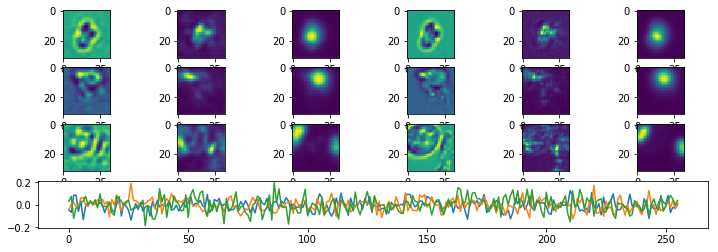

Epoch:  15 Iteration:  0 Loss:  7.5382757 6.9921026 0.5461731


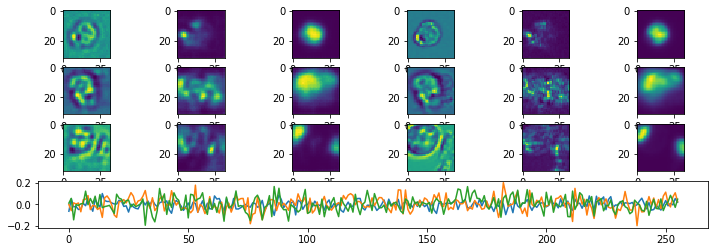

Epoch:  16 Iteration:  0 Loss:  7.720985 7.1860075 0.53497744


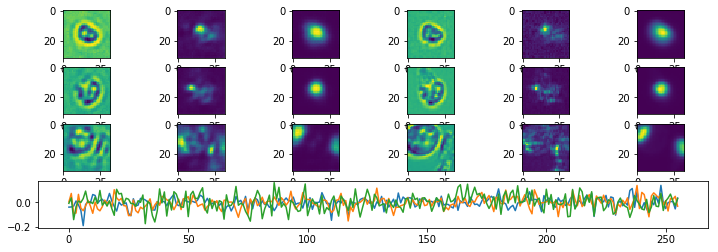

Epoch:  17 Iteration:  0 Loss:  6.3995 5.880628 0.51887167


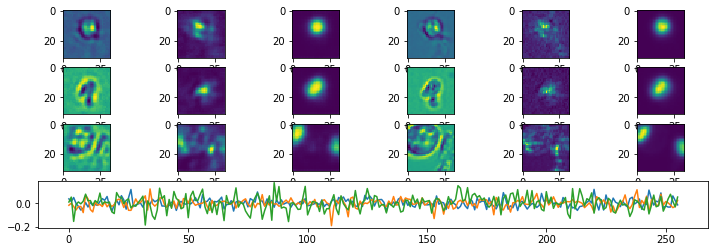

Epoch:  18 Iteration:  0 Loss:  6.899742 6.388788 0.5109538


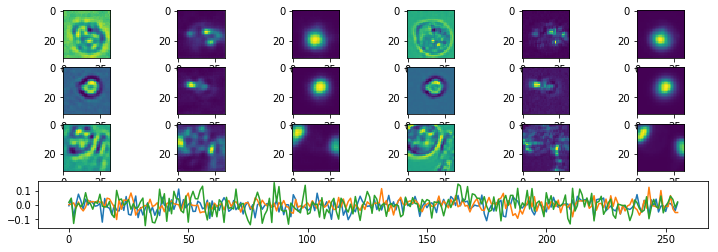

Epoch:  19 Iteration:  0 Loss:  6.692476 6.201175 0.4913008


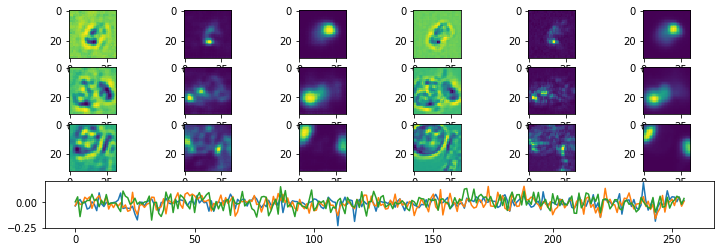

Epoch:  20 Iteration:  0 Loss:  6.420952 5.950894 0.4700581


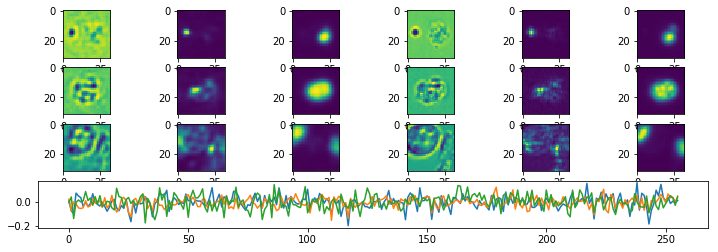

Epoch:  21 Iteration:  0 Loss:  6.719324 6.2498136 0.4695104


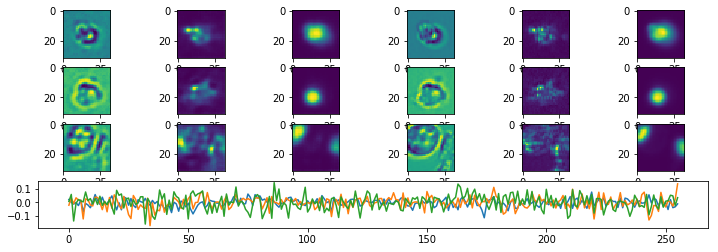

Epoch:  22 Iteration:  0 Loss:  6.3069525 5.859285 0.44766754


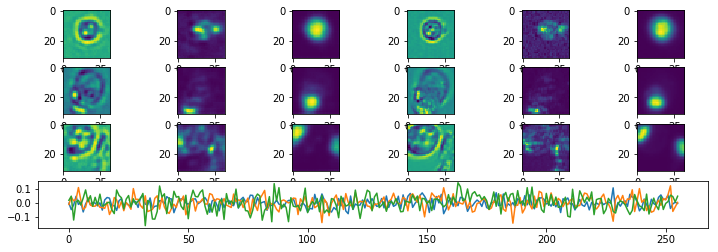

Epoch:  23 Iteration:  0 Loss:  6.1615067 5.719789 0.44171777


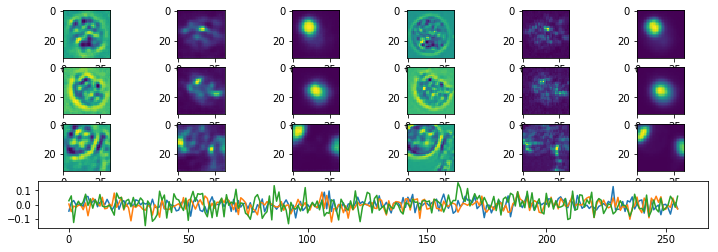

Epoch:  24 Iteration:  0 Loss:  5.6515813 5.2261443 0.4254369


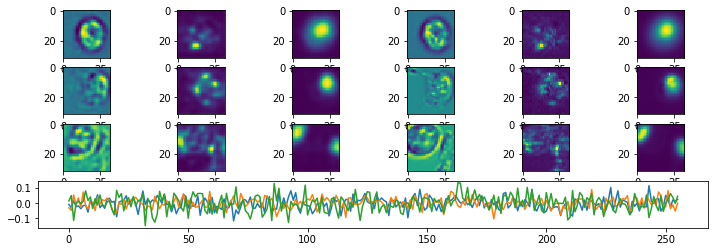

Epoch:  25 Iteration:  0 Loss:  5.668842 5.25753 0.4113117


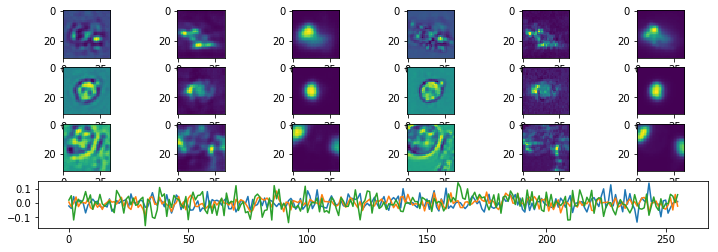

Epoch:  26 Iteration:  0 Loss:  5.754939 5.3502398 0.40469947


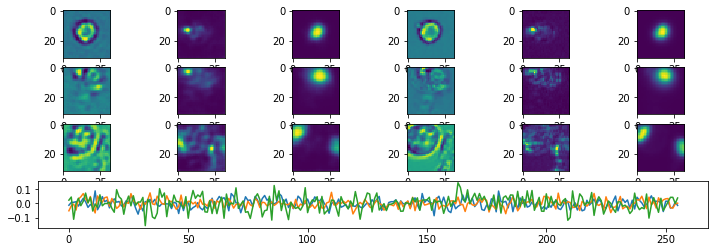

Epoch:  27 Iteration:  0 Loss:  5.4373107 5.0331955 0.40411532


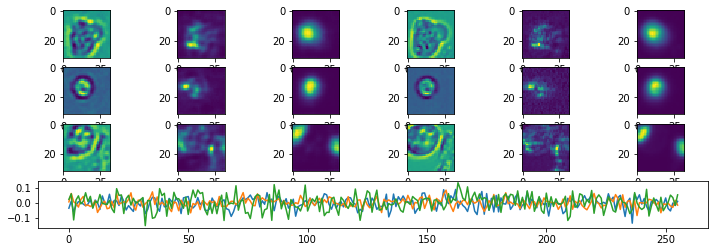

Epoch:  28 Iteration:  0 Loss:  5.4179516 5.028327 0.38962466


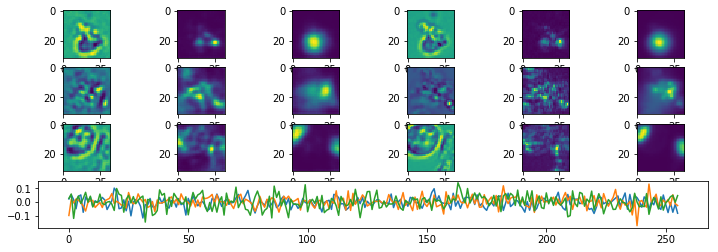

Epoch:  29 Iteration:  0 Loss:  5.7439423 5.352605 0.39133754


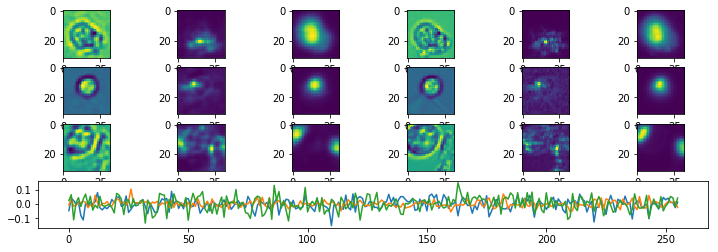

Epoch:  30 Iteration:  0 Loss:  5.141749 4.7672873 0.37446168


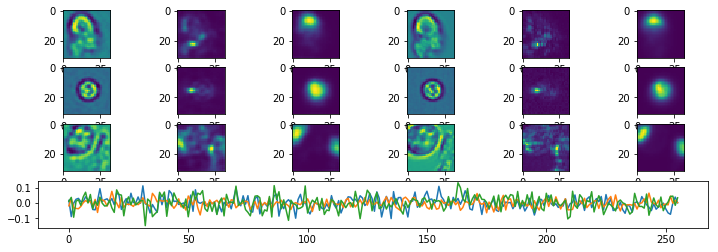

Epoch:  31 Iteration:  0 Loss:  5.1014338 4.728485 0.37294877


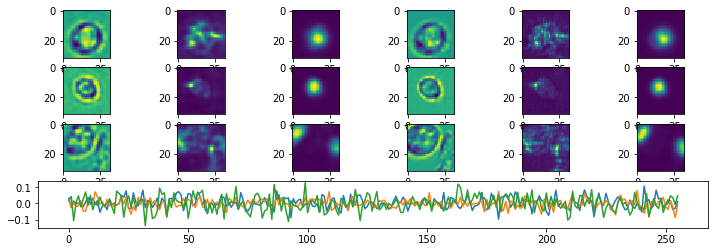

Epoch:  32 Iteration:  0 Loss:  5.4783273 5.117195 0.36113235


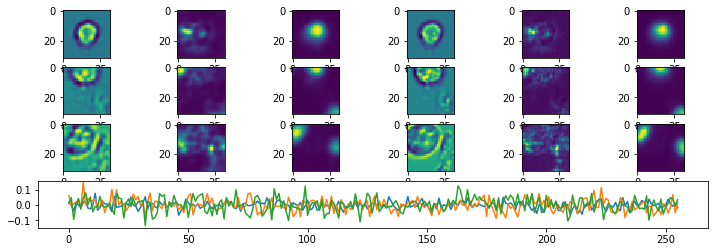

Epoch:  33 Iteration:  0 Loss:  5.1971154 4.827474 0.36964136


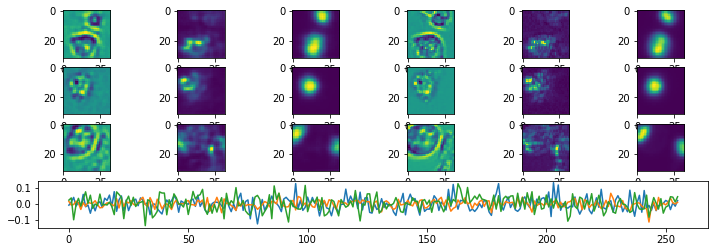

Epoch:  34 Iteration:  0 Loss:  4.7504673 4.403825 0.34664264


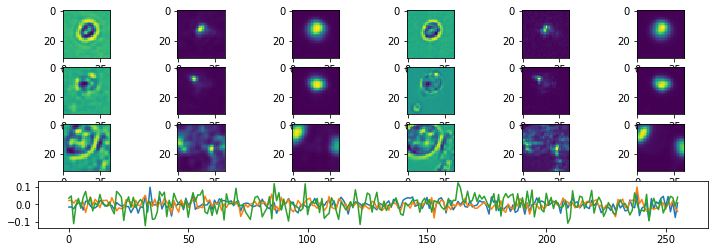

Epoch:  35 Iteration:  0 Loss:  5.019956 4.672069 0.34788698


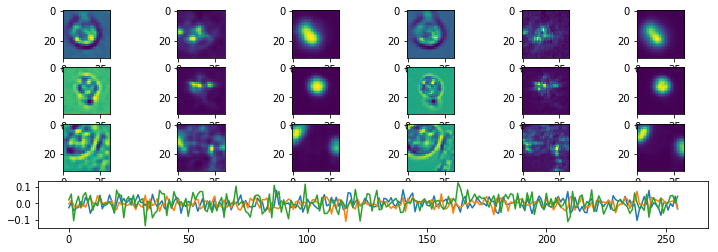

Epoch:  36 Iteration:  0 Loss:  5.1566954 4.8150377 0.34165743


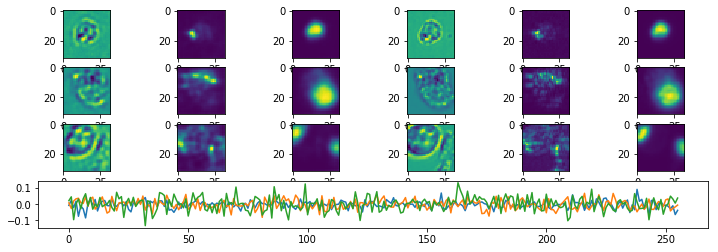

Epoch:  37 Iteration:  0 Loss:  5.0686393 4.7269564 0.34168276


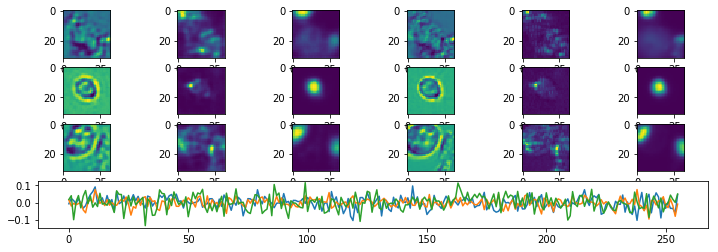

Epoch:  38 Iteration:  0 Loss:  4.6011004 4.279525 0.32157543


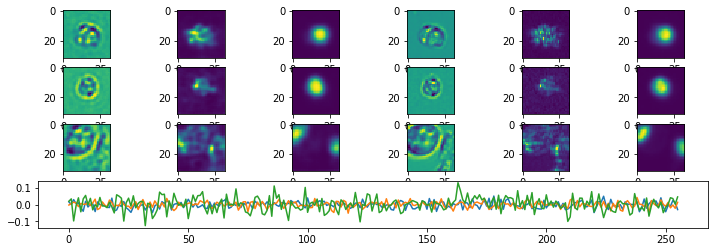

Epoch:  39 Iteration:  0 Loss:  4.599614 4.276321 0.3232934


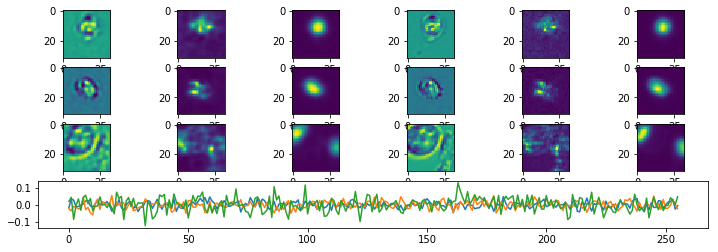

Epoch:  40 Iteration:  0 Loss:  4.4973125 4.177767 0.31954554


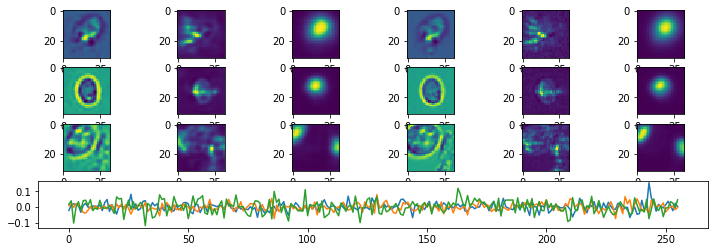

Epoch:  41 Iteration:  0 Loss:  4.3618684 4.046777 0.31509158


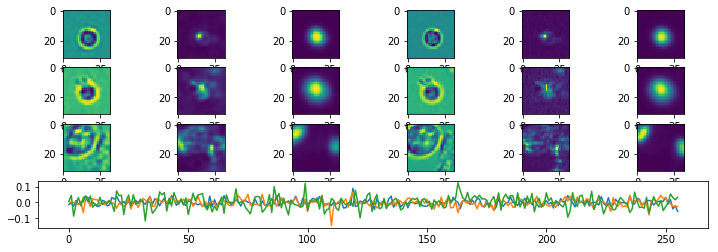

Epoch:  42 Iteration:  0 Loss:  4.5968504 4.2851644 0.31168625


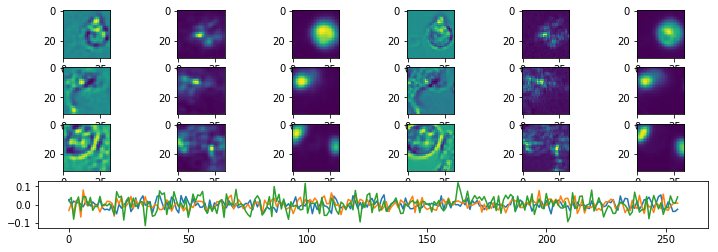

Epoch:  43 Iteration:  0 Loss:  4.5321436 4.222717 0.3094268


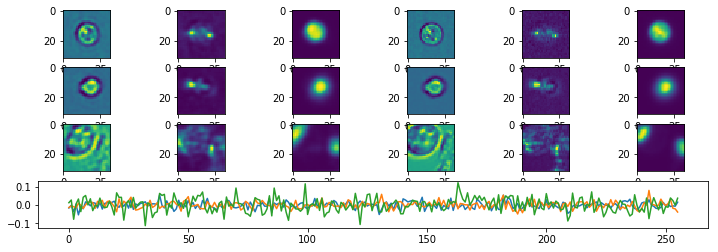

Epoch:  44 Iteration:  0 Loss:  4.39297 4.0899234 0.30304673


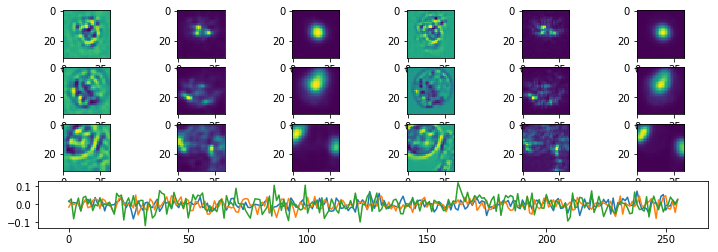

Epoch:  45 Iteration:  0 Loss:  4.214839 3.9189801 0.2958588


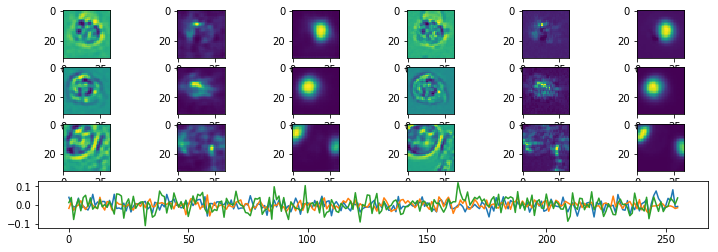

Epoch:  46 Iteration:  0 Loss:  4.3164973 4.0182395 0.29825762


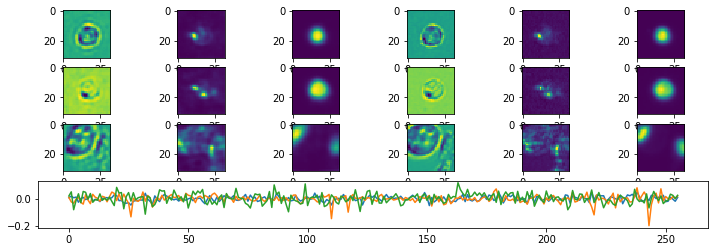

Epoch:  47 Iteration:  0 Loss:  4.2893605 4.002719 0.28664148


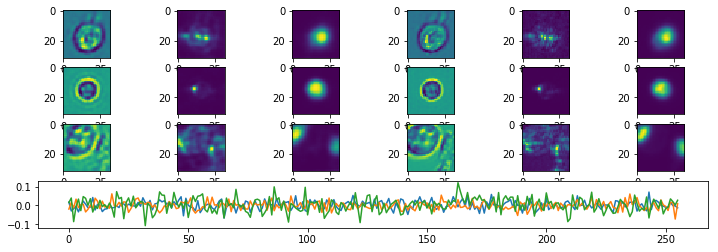

Epoch:  48 Iteration:  0 Loss:  4.2440104 3.9569476 0.2870628


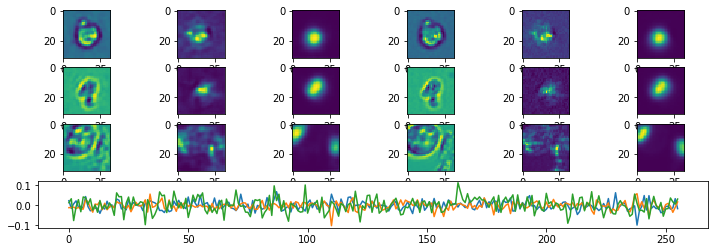

Epoch:  49 Iteration:  0 Loss:  4.203186 3.9272537 0.27593228


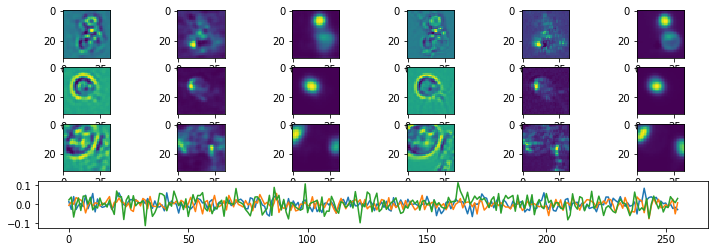

Epoch:  50 Iteration:  0 Loss:  4.123147 3.845593 0.27755383


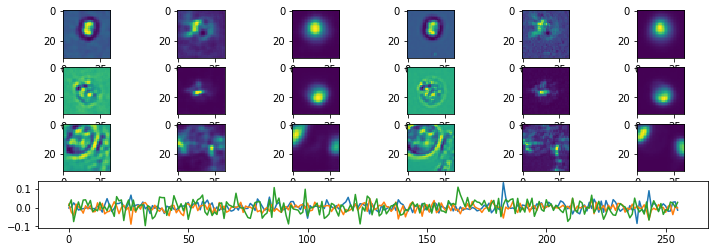

Epoch:  51 Iteration:  0 Loss:  4.1103897 3.8323178 0.27807197


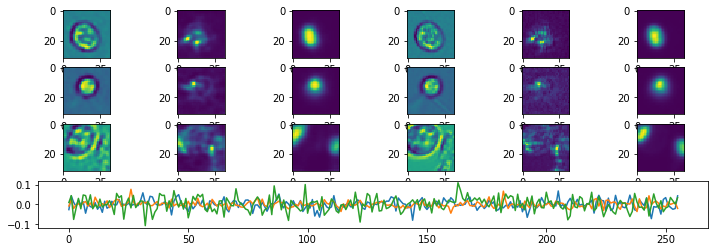

Epoch:  52 Iteration:  0 Loss:  4.29198 4.0172224 0.2747574


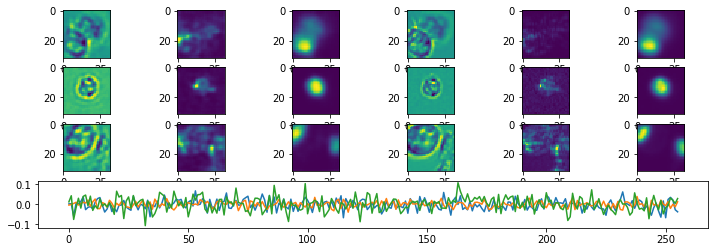

Epoch:  53 Iteration:  0 Loss:  4.1160645 3.8523912 0.26367345


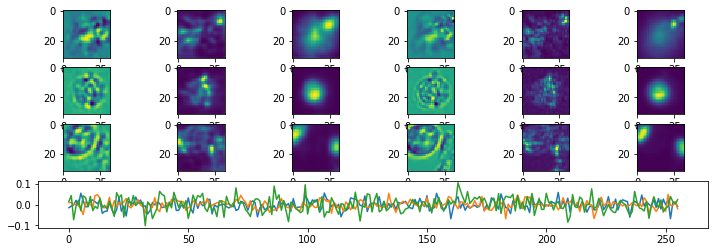

Epoch:  54 Iteration:  0 Loss:  4.021161 3.7618108 0.25935006


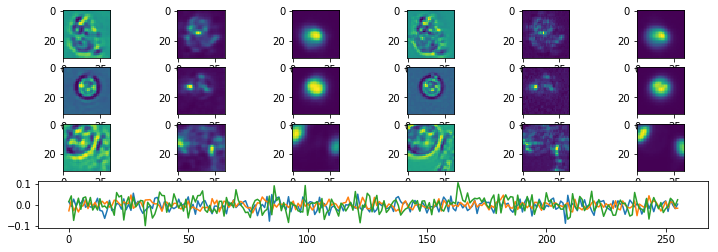

Epoch:  55 Iteration:  0 Loss:  4.1946077 3.9268262 0.26778162


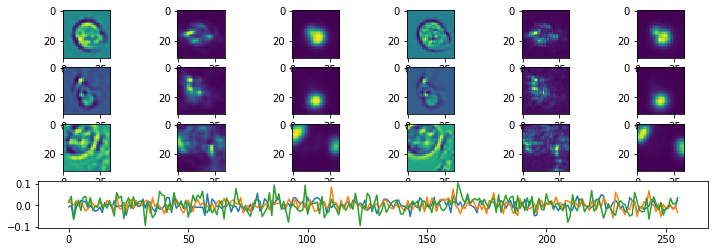

Epoch:  56 Iteration:  0 Loss:  3.8018203 3.5486667 0.2531536


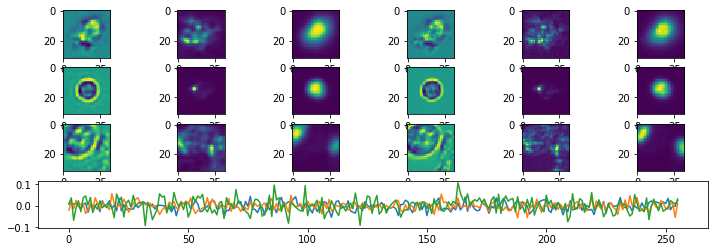

Epoch:  57 Iteration:  0 Loss:  3.865859 3.6121328 0.25372624


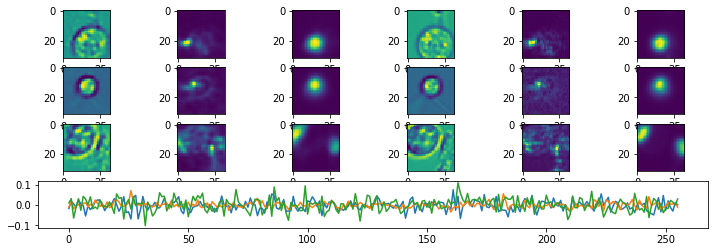

Epoch:  58 Iteration:  0 Loss:  3.991022 3.7337196 0.25730255


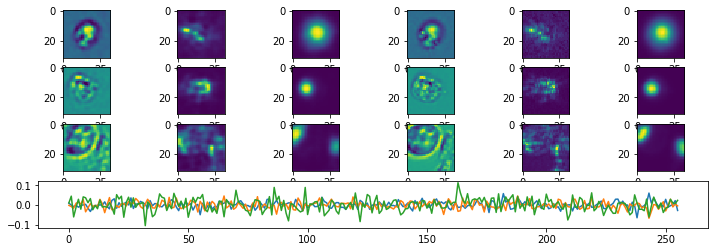

Epoch:  59 Iteration:  0 Loss:  3.7418664 3.4893296 0.25253677


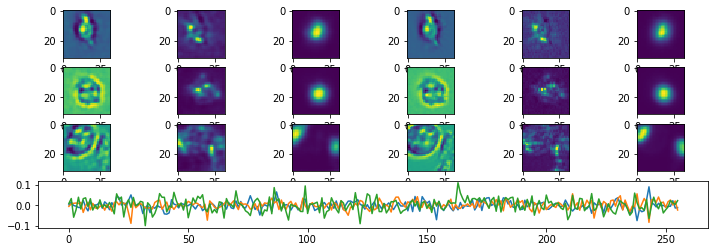

Epoch:  60 Iteration:  0 Loss:  3.8036628 3.5517044 0.25195825


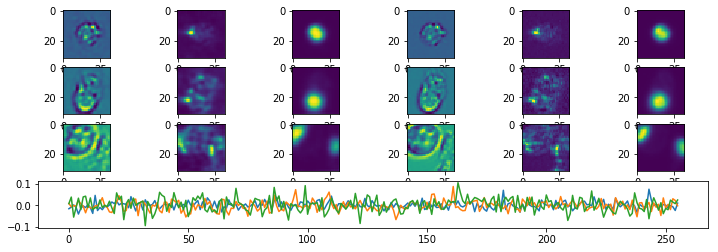

Epoch:  61 Iteration:  0 Loss:  4.072341 3.8280447 0.24429652


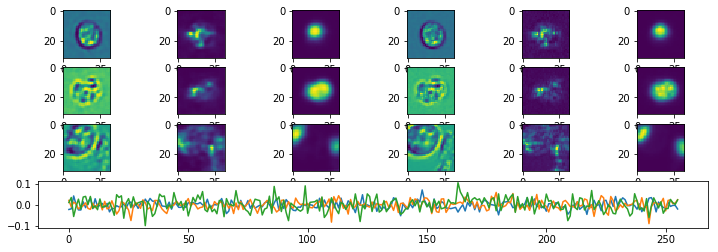

Epoch:  62 Iteration:  0 Loss:  3.9399076 3.7027895 0.23711804


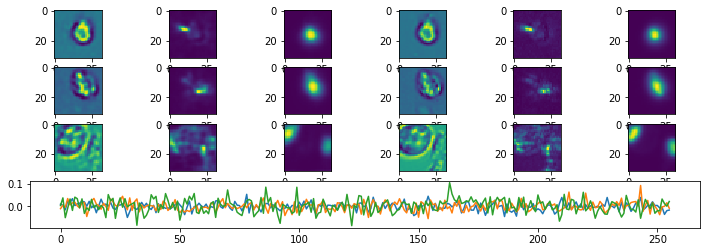

Epoch:  63 Iteration:  0 Loss:  3.719129 3.474815 0.24431409


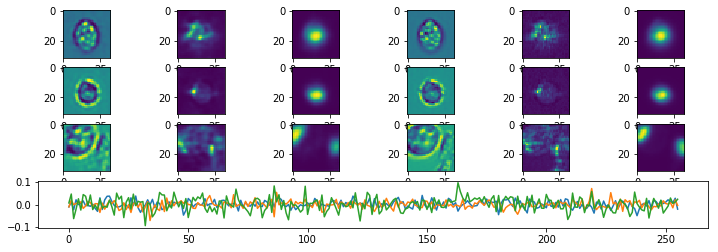

Epoch:  64 Iteration:  0 Loss:  3.60617 3.3758028 0.23036711


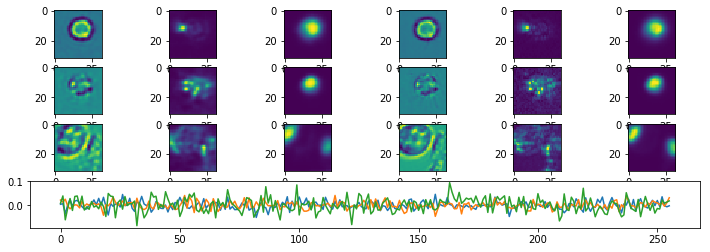

Epoch:  65 Iteration:  0 Loss:  3.5744283 3.342166 0.23226233


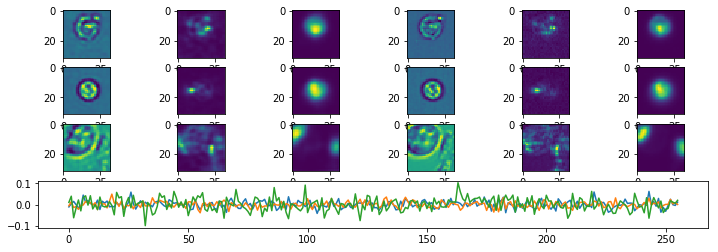

Epoch:  66 Iteration:  0 Loss:  3.5671995 3.3341787 0.23302089


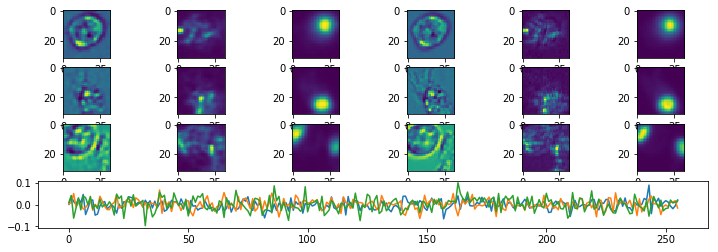

Epoch:  67 Iteration:  0 Loss:  3.6361482 3.4066467 0.22950138


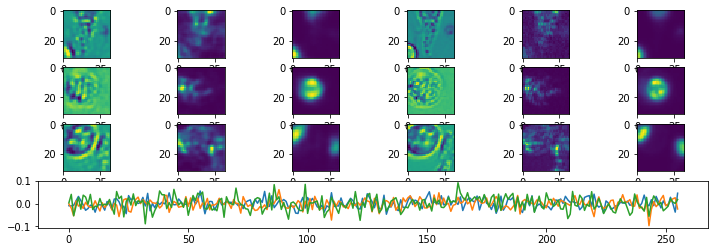

Epoch:  68 Iteration:  0 Loss:  3.8348384 3.606832 0.22800627


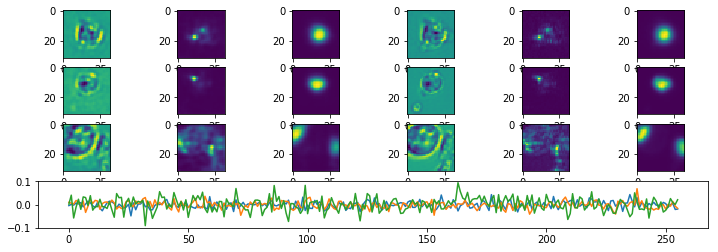

Epoch:  69 Iteration:  0 Loss:  3.5428753 3.3233876 0.21948771


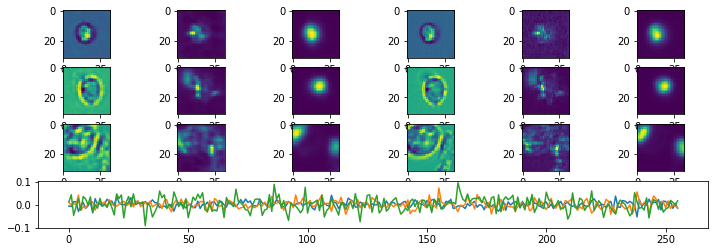

Epoch:  70 Iteration:  0 Loss:  3.9103537 3.6804972 0.2298565


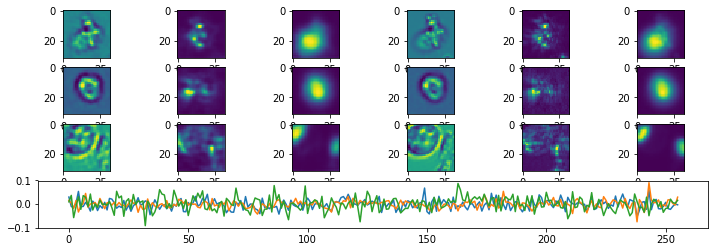

Epoch:  71 Iteration:  0 Loss:  3.6717005 3.4485857 0.22311468


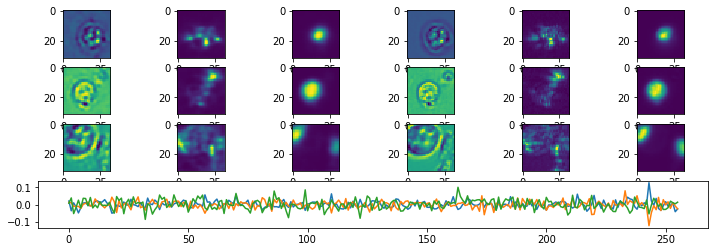

Epoch:  72 Iteration:  0 Loss:  3.6389675 3.4218802 0.21708733


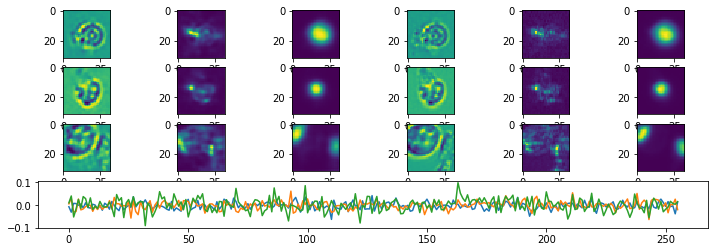

Epoch:  73 Iteration:  0 Loss:  3.5562108 3.3386405 0.21757035


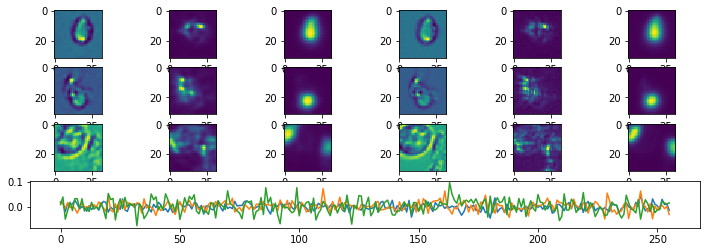

Epoch:  74 Iteration:  0 Loss:  3.5104852 3.29499 0.21549506


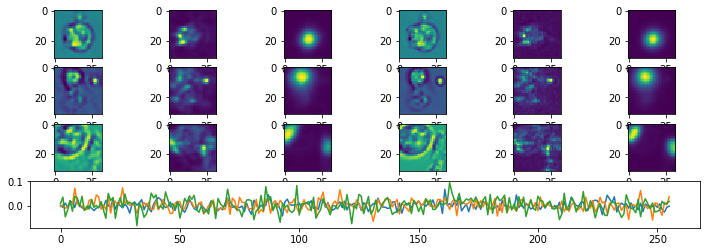

Epoch:  75 Iteration:  0 Loss:  3.7976823 3.587905 0.20977727


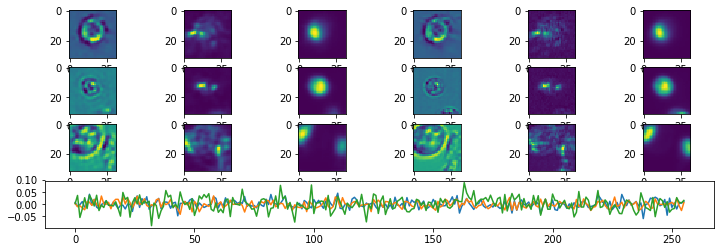

Epoch:  76 Iteration:  0 Loss:  3.5111082 3.2966847 0.21442345


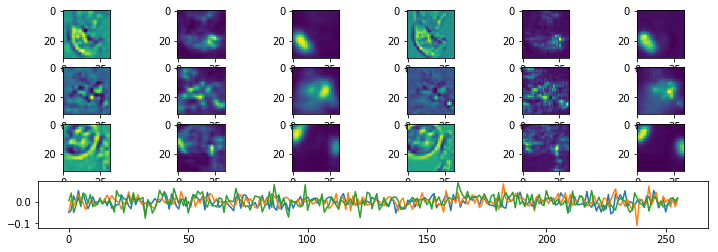

Epoch:  77 Iteration:  0 Loss:  3.7078273 3.4945393 0.21328816


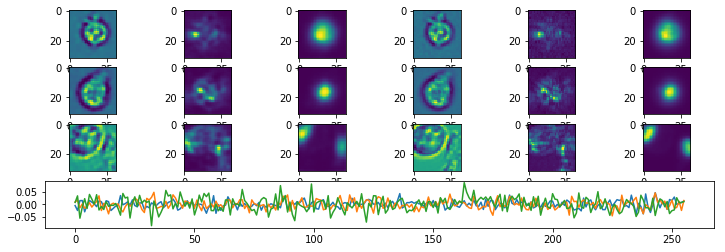

Epoch:  78 Iteration:  0 Loss:  3.4290807 3.2262607 0.20282003


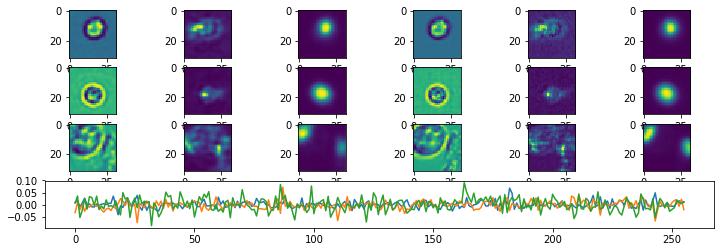

Epoch:  79 Iteration:  0 Loss:  3.532096 3.3299026 0.20219316


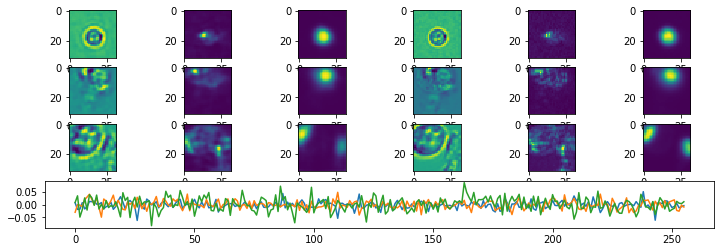

Done


In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 3
p_channels = [0,2, 4]
p_nepochs = 80
p_batchsize = 128
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 256 #128 + 64
p_droprate = 0.95
p_stdev = .04
p_slam = .0005
p_denoise = None
enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-10-31-Snail"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 500, cpdir)

In [5]:
x = 4
x

4